In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [4]:
'''
Reading the diabetes dataset.
'''

diabetes_data = pd.read_csv('../data/diabetes.csv')
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [23]:
'''
Splitting the dataset into train, test and validation sets.
'''

training_set = diabetes_data[:650]
test_set = diabetes_data[650:750]
validation_set = diabetes_data[750:]

print "Training set dims: ", training_set.shape
print "Test set dims: ", test_set.shape
print "Validation set dims: ", validation_set.shape

X_train = np.asarray(training_set.drop(labels=['Outcome'],axis=1))
X_test = np.asarray(test_set.drop(labels=['Outcome'],axis=1))
X_val = np.asarray(validation_set.drop(labels=['Outcome'],axis=1))

y_train = np.asarray(training_set['Outcome'])
y_test = np.asarray(test_set['Outcome'])
y_val = np.asarray(validation_set['Outcome'])

print "Training data array dims: ", X_train.shape
print "Testing data array dims: ", X_test.shape
print "Validation data array dims: ", X_val.shape

Training set dims:  (650, 9)
Test set dims:  (100, 9)
Validation set dims:  (18, 9)
Training data array dims:  (650, 8)
Testing data array dims:  (100, 8)
Validation data array dims:  (18, 8)


In [24]:
'''
Standardizing/Re-scaling the data:

Applying row-wise mean and standard deviation and then standardize as below--
(X - mean(X))/std(X)

'''
training_means = np.mean(X_train,axis=0)
training_std = np.std(X_train,axis=0)

# use the mean/sd of training dataset to standardize the test set too!
X_train_standardized = (X_train - training_means)/training_std
X_test_standardized = (X_test - training_means)/training_std

#compare normal & scaled datapoint
print "Normal: ", X_train[:1]
print "Scaled: ", X_train_standardized[:1]

Normal:  [[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]]
Scaled:  [[ 0.65609843  0.85947618  0.17307096  0.91892478 -0.6856602   0.22643904
   0.43769718  1.45472123]]


In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

training_accuracy = model.score(X_test, y_test)
print "Training Accuracy: ", training_accuracy*100, "%"
print "Model coefficients: ", model.coef_

Training Accuracy:  76.0 %
Model coefficients:  [[ 1.26565131e-01  2.58913227e-02 -1.69931846e-02 -4.07209378e-04
  -2.69966585e-04  6.32995386e-02  7.23316699e-01  2.12817396e-03]]


                   features     coeff
6  DiabetesPedigreeFunction  0.723317
0               Pregnancies  0.126565
5                       BMI  0.063300
1                   Glucose  0.025891
7                       Age  0.002128
4                   Insulin -0.000270
3             SkinThickness -0.000407
2             BloodPressure -0.016993


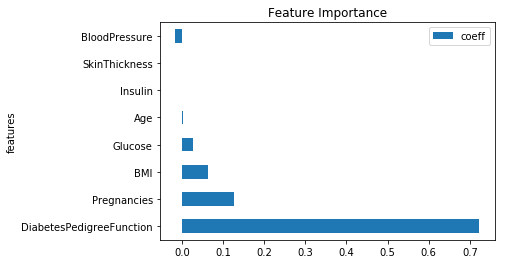

In [36]:
columns = list(training_set.drop(['Outcome'],axis=1).columns)
coefficicents = model.coef_[0] # inner list contains the coeffs

feature_importance = pd.DataFrame()
feature_importance['features'] = columns
feature_importance['coeff'] = coefficicents
# feature_importance.head(2)
feature_importance.sort_values(by=['coeff'],ascending=False,inplace=True)
print feature_importance

feature_importance['positive'] = feature_importance['coeff'] > 0
feature_importance.set_index(['features'],inplace=True)

feature_importance.plot(kind='barh',title='Feature Importance')

In [48]:
X_val_standardized = (X_val - training_means)/training_std

predicted_validation_probabilities = model.predict_proba(X_val_standardized)
predicted_validations = model.predict(X_val_standardized)


print predicted_validations
'''[PENDING]'''
# validation_result = validation_data
# validation_result['Prediction'] = predicted_validations.tolist()
# validation_result['Probability'] = predicted_validation_probabilities.tolist()



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


'[PENDING]'